# Prepare kaggle environment

In order to create a Kaggle environment in Colab, we will need to install the Kaggle library, upload our Kaggle credentials, and download and uncompress the target dataset. Once set up, we will have seamless access to Kaggle datasets and the ability to compete in machine learning competitions./


In [ ]:
# Install kaggle library
!pip install kaggle

In [ ]:
# Upload kaggle credential
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
# Prepare kaggle environment
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:23<00:00, 153MB/s]
100% 2.04G/2.04G [00:23<00:00, 93.7MB/s]


In [ ]:
# decompress dataset
!unzip plantvillage-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

# Creating metadata dataset

In [ ]:
import os
import pandas as pd

base_path = "/content/plantvillage dataset/color"

# Getting categories from folder
categories = [f"{base_path}/{folder}" for folder in os.listdir(base_path)]


# Getting raw data from folder path
rows = []

for category in categories:
  images_path = [f"{category}/{file}" for file in os.listdir(category)]

  for image_path in images_path:
    rows.append([category.split("/")[-1], image_path])

columns = ["CATEGORY", "IMAGE_PATH"]

df = pd.DataFrame(rows, columns=columns)
df

,CATEGORY,IMAGE_PATH
0,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...
1,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...
2,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...
3,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...
4,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...
...,...,...
54300,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...
54301,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...
54302,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...
54303,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...


# Analyzing outliers based on median criteria

In [ ]:
# Getting basic statistic

import cv2
import numpy as np

images_path = df["IMAGE_PATH"].values.tolist()
medians_images = []

for image_path in images_path:
  gray_image = cv2.imread(image_path, 0)
  resized_image = cv2.resize(gray_image, (256, 256))
  medians_images.append([image_path, np.median(resized_image)])

df_medians = pd.DataFrame(medians_images, columns=["IMAGE_PATH", "MEDIAN"])
df_medians

,IMAGE_PATH,MEDIAN
0,/content/plantvillage dataset/color/Tomato___B...,115.0
1,/content/plantvillage dataset/color/Tomato___B...,101.0
2,/content/plantvillage dataset/color/Tomato___B...,101.0
3,/content/plantvillage dataset/color/Tomato___B...,94.0
4,/content/plantvillage dataset/color/Tomato___B...,95.0
...,...,...
54300,/content/plantvillage dataset/color/Tomato___S...,124.0
54301,/content/plantvillage dataset/color/Tomato___S...,133.0
54302,/content/plantvillage dataset/color/Tomato___S...,127.0
54303,/content/plantvillage dataset/color/Tomato___S...,124.0


In [ ]:
# Getting boxplot
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=df_medians['MEDIAN'], name='MEDIAN'))
fig.show()

In [ ]:
# Getting outliers images with modified criteria

import matplotlib.pyplot as plt

df_medians_ = pd.DataFrame(df_medians['MEDIAN'], columns=["MEDIAN"])

Q1 = df_medians_['MEDIAN'].quantile(0.25)
Q3 = df_medians_['MEDIAN'].quantile(0.75)
IQR = Q3 - Q1

print(f"Quartil 1: {Q1}")
print(f"Quartil 3: {Q3}")
print(f"IQR: {IQR}")
print(f"Criteria filtering low: {Q1 - 1.5 * IQR}")
print(f"Criteria filtering high: {Q3 + 1.5 * IQR}")

Quartil 1: 112.0
Quartil 3: 137.0
IQR: 25.0
Criteria filtering low: 74.5
Criteria filtering high: 174.5


There are 767 outliers


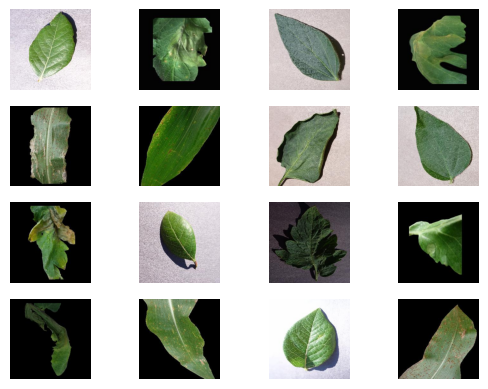

In [ ]:
CRITERIA = 2

# Filter outliers
filter = (df_medians_['MEDIAN'] < Q1 - CRITERIA * IQR) | (df_medians_['MEDIAN'] > Q3 + CRITERIA * IQR)
filtered_df = pd.DataFrame(df_medians.loc[filter]["IMAGE_PATH"], columns=["IMAGE_PATH"])

print(f"There are {len(filtered_df)} outliers")

# Sampling and showing outliers
sample_images = filtered_df.sample(16, random_state=70).values.tolist()
sample_images = [sample[0] for sample in sample_images]

# Create a figure and subplots
fig, axs = plt.subplots(4, 4)

# Iterate over the images and plot them in the subplots
for i, ax in enumerate(axs.flat):
    image = cv2.imread(sample_images[i])
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.axis('off')

# Show the plot
plt.show()

# Filtering outliers

In [ ]:
# Filtering outliers from base data
df_filter = pd.merge(df, filtered_df, on='IMAGE_PATH', how='left', indicator=True)
df_filter = df_filter[df_filter['_merge'] == 'left_only']
df_filter

,CATEGORY,IMAGE_PATH,_merge
0,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...,left_only
1,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...,left_only
2,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...,left_only
3,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...,left_only
4,Tomato___Bacterial_spot,/content/plantvillage dataset/color/Tomato___B...,left_only
...,...,...,...
54300,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...,left_only
54301,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...,left_only
54302,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...,left_only
54303,Tomato___Spider_mites Two-spotted_spider_mite,/content/plantvillage dataset/color/Tomato___S...,left_only


In [ ]:
df = df_filter

# Analizing raw data

In [ ]:
import plotly.express as px

category_counts = df.groupby("CATEGORY").size().reset_index(name="COUNT")

fig = px.bar(category_counts, x="CATEGORY", y="COUNT")
fig.show()

After analyzing the previous plot, it is evident that the categories with the highest number of samples are Orange___Haunglongbing_(Citrus_greening), Tomato___Tomato_Yellow_Leaf_Curl_Virus, and Soybean___healthy. A qualitative analysis indicates that there is an overall imbalance among the different categories.

# Transforming dataset into target analysis

Out main goal is to classify  berween healthy and unhealthy. Formatting the previous data, we can get

In [ ]:
def check_health(string):
    if "healthy" in string:
        return "healthy"
    else:
        return "no healthy"

df_transformed = df
df_transformed["CATEGORY_BIN"] = df_transformed["CATEGORY"].apply(lambda value: check_health(value.lower()))

In [ ]:
category_counts = df_transformed.groupby("CATEGORY_BIN").size().reset_index(name="COUNT")

fig = px.bar(category_counts, x="CATEGORY_BIN", y="COUNT")
fig.show()

The previous information is not surprising, given that we already knew that we have an unbalanced dataset. This should be taken into account while training the model

In [ ]:
# Saving dataframe as csv
df_transformed.to_csv("transformed_categories.csv", index=False)